## Connect to drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Install necessary packages

In [ ]:
!pip install tensorflow scikit-learn matplotlib

## Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load and preprocess image data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directory paths
train_data_dir = '/content/gdrive/MyDrive/skin_disease_dataset/Split_smol/train'
test_data_dir = '/content/gdrive/MyDrive/skin_disease_dataset/Split_smol/val'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # To ensure the order of predictions matches the order of images
)

Found 1849 images belonging to 8 classes.
Found 459 images belonging to 8 classes.


## Define the model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax') # There are 8 classes
])

## Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size,
    verbose=1
)

NameError: name 'model' is not defined

## Save predictions of test data to a CSV file

In [ ]:


import os

# Define the directory path
directory = '/content/gdrive/MyDrive/skin_disease_dataset/Split_smol/'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Save predictions of test data to a CSV file
test_predictions = model.predict(test_generator)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

results_df = pd.DataFrame({'Actual Label': [class_labels[i] for i in true_labels],
                           'Predicted Label': [class_labels[i] for i in predicted_labels]})

# Save the CSV file to the directory
results_df.to_csv(os.path.join(directory, 'test_predictions.csv'), index=False)

15/15 [==============================] - 22s 1s/step


## Evaluate the model on test set

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy}')

15/15 [==============================] - 20s 1s/step - loss: 1.6518 - accuracy: 0.5033
Test Accuracy: 0.5032680034637451


## Plot training history

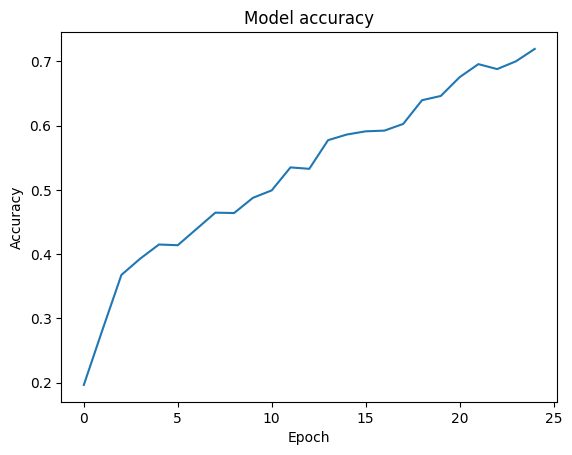

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Calculate precision, recall, f1-score

In [ ]:
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: [0.26       0.54545455 0.65671642 0.39130435 0.5        0.62162162
 0.39393939 0.61971831]
Recall: [0.23214286 0.4        0.63768116 0.38297872 0.72222222 0.39655172
 0.4        0.88      ]
F1-score: [0.24528302 0.46153846 0.64705882 0.38709677 0.59090909 0.48421053
 0.39694656 0.72727273]


## Plot confusion matrix

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  5  7 10  2  1 17  1]
 [ 6 24  4  4  0  1 12  9]
 [ 4  3 44  0  9  3  5  1]
 [ 5  5  3 18  3  2  4  7]
 [ 1  1  0  4 39  5  0  4]
 [ 1  1  5  2 22 23  1  3]
 [17  5  4  6  3  2 26  2]
 [ 3  0  0  2  0  0  1 44]]


## Calculate precision, recall, f1-score

In [ ]:
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.5024793901176299
Recall: 0.5032679738562091
F1-score: 0.49330550866261


## Plot model accuracy

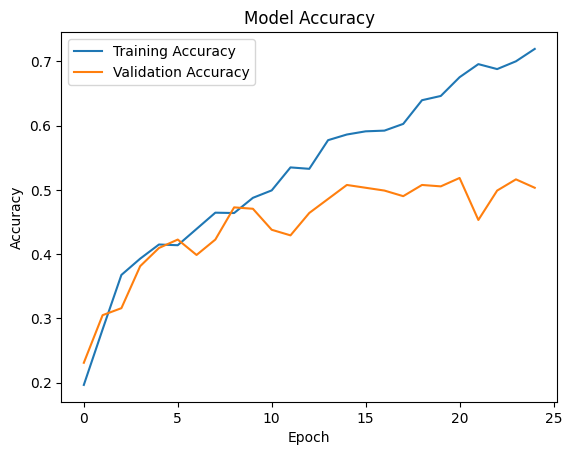

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot model loss

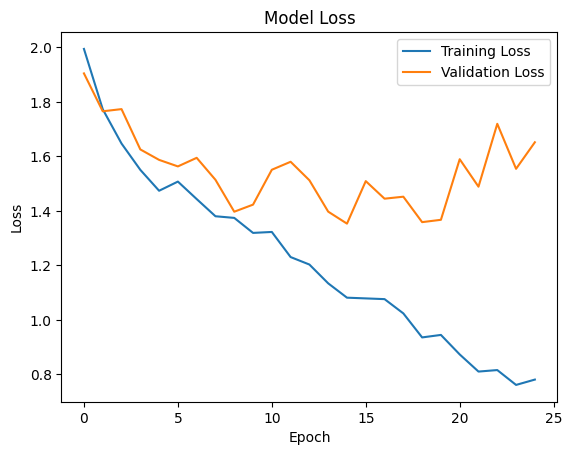

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()